In [165]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.integrate import odeint
import scipy

import ipywidgets as widgets

## Inviscid Burgers' equation (Уравнение Хопфа): 
### $\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0$

### $-5 < x < 10$

### $u(x, 0)=exp(-x^2/2)$

### $0 < t < t_{max} = 1$

Общее решение:

$u(x, t)=f(x - ut)$

$u(x, 0) = f(x) = exp(-\frac{x^2}{2})$

$u(x, t) = exp(-\frac{(x-ut)^2}{2})$

### Задание:
***1) Найти максимальную невязку***

***2) Сравнить два численных метода***

In [128]:
a = -5
b = 10
t_min = 0
t_max = 10

In [129]:
n = 1000

x = np.linspace(a, b, n)
t = np.linspace(t_min, t_max, n)

In [200]:
def u0(x):
    return np.where(x < 5, 1, 0)

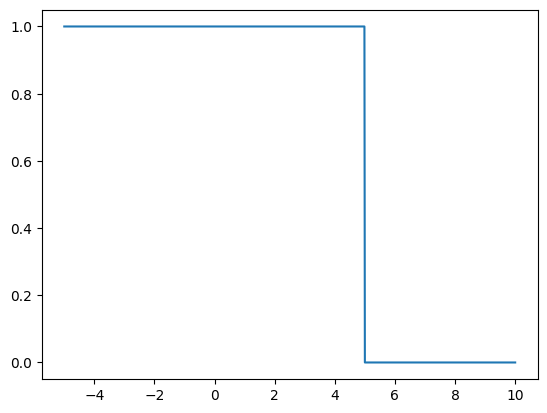

In [201]:
plt.plot(x, u0(x))

In [202]:
def EulerMethod(X: np.array, T: np.array):
    dt = T[1] - T[0]
    dx = X[1] - X[0]

    u = np.zeros((X.size, T.size))
    
    # Initial conditions
    u[:, 0] = u0(X) 

    for n in range(T.size - 1):
        for i in range(1, X.size - 1):
            u[i, n+1] = u[i, n] - u[i, n] * (dt/dx) * (u[i, n] - u[i - 1, n])

    return u

In [203]:
mu = 1
nu = 0.05 #kinematic viscosity coefficient

dx = x[1] - x[0]
k = 2 * np.pi*np.fft.fftfreq(n, d = dx)
  
u0_init = u0(x) 

def burg_system(u,t,k,mu,nu):
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    
    u_t = -mu*u*u_x + nu*u_xx
    return u_t.real

In [204]:
U_spec = odeint(burg_system, u0_init, t, args=(k,mu,nu,), mxstep=n).T

In [205]:
U_gt = EulerMethod(x, t)

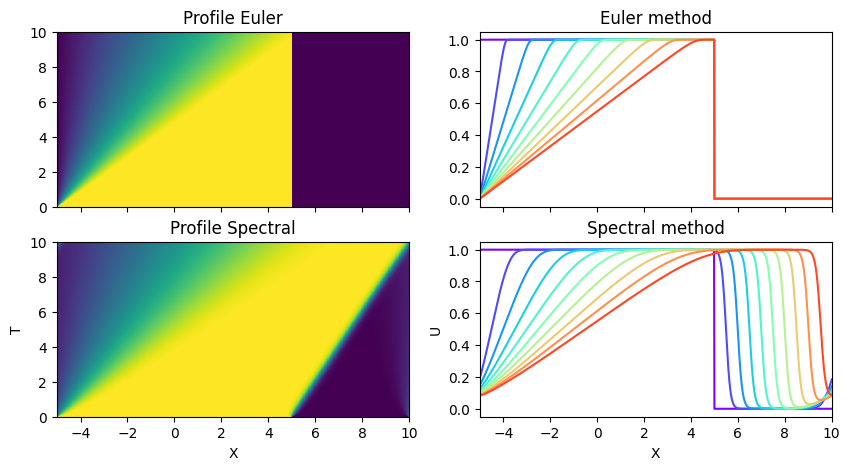

In [206]:
fg, ax = plt.subplots(2, 2, figsize=(10, 5), dpi=100, sharex=True)
ax[0, 0].pcolormesh(x, t, U_gt.T)
ax[0, 0].set_title("Profile Euler")
grid = 10
colour=iter(cm.rainbow(np.linspace(0,10,100)))
for i in range(0, t.size, t.size // grid):
    c=next(colour)
    ax[0, 1].set_title("Euler method")
    ax[0, 1].plot(x, U_gt[:, i], c=c)

ax[1, 0].pcolormesh(x, t, U_spec.T)
ax[1, 0].set_title("Profile Spectral")
ax[1, 0].set_xlabel("X")
ax[1, 0].set_ylabel("T")
grid = 10
colour=iter(cm.rainbow(np.linspace(0,10,100)))
for i in range(0, t.size, t.size // grid):
    c=next(colour)
    ax[1, 1].set_title("Spectral method")
    ax[1, 1].set_xlabel("X")
    ax[1, 1].set_ylabel("U")
    ax[1, 1].plot(x, U_spec[:, i], c=c)

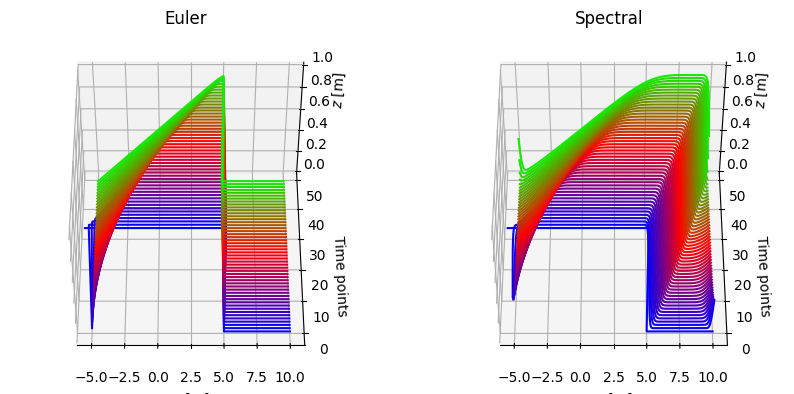

In [207]:
fg, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100, subplot_kw=dict(projection='3d'))

ax[0].set_title('Euler')
ax[1].set_title('Spectral')

ax[0].set_xlabel('$x$ [$\mathrm{m}$]')
ax[0].set_ylabel('Time points')
ax[0].set_zlabel('$z \ [\mathrm{m}]$')

ax[1].set_xlabel('$x$ [$\mathrm{m}$]')
ax[1].set_ylabel('Time points')
ax[1].set_zlabel('$z \ [\mathrm{m}]$')

ax[0].view_init(50, -90)
ax[1].view_init(50, -90)

y_plot0 = U_gt.T[0:-1:20,:]
y_plot1 = U_spec.T[0:-1:20,:]
for j in range(y_plot0.shape[0]):
    ys = j*np.ones(y_plot0.shape[1])
    ax[0].plot(x,ys, y_plot0[j,:], color = plt.cm.brg(j *  5))
    ax[1].plot(x,ys, y_plot1[j,:], color = plt.cm.brg(j *  5))

plt.show()

In [177]:
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return scipy.misc.derivative(wraps, point[var], dx = 1e-6)

In [197]:
def BurgersGT(X, T):
    
    def integral1(p):
        return scipy.integrate.quad(u, 0, p)
    
    def function(x, x_dash):
        return np.exp(-(x - x_dash)**2 / (4 * t))
    
    def func(x, t):
        return lambda x:   np.log((4 * np.pi * t) ** (-1/2) * \
                           scipy.integrate.quad(lambda x_p: np.exp(-((x - x_p)**2 / 4 * t)) - 1/2 * integral(x_p), -np.inf, +np.inf))
    
    return 2 * partial_derivative(func,  var=0, point=[X, T])

In [195]:
U_groud_truth = np.zeros((x.size, t.size))

In [196]:
for i in range(x.size):
    for j in range(t.size):
        print(x[i], t[j])
        U_groud_truth = BurgersGT(x[i], t[j])

-5.0 0.0


TypeError: unsupported operand type(s) for *: 'float' and 'function'